<a href="https://colab.research.google.com/github/rrfsantos/Projeto-Plus-Size/blob/master/Tweets_Plus_Size_AnaliseSentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de sentimentos em tweets sobre o tópico CORONAVIRUS

Repositório: 

Script criado pelo Laboratório de inteligência Artificial da PUC-Rio.

Assunto: Análise de sentinetos em tweets em inglês sobre o tópico 'coronavirus', para ser apresentado na série de palestras sobre como a Inteligência Artificial é capaz de ajudar neste momento de pandemia, do curso de pós graduação BIMASTER (https://bit.ly/ia-puc-rio).

Palestras gravadas podem ser encontradas no link http://www.iacontracovid.com.br/palestras/

Aplicações desenvolvidas pelo laboratório podem ser testadas e avaliadas no link http://www.iacontracovid.com.br

*Tweets carregados aqui foram extraídos pelo script 'Tweets_Covid-19.ipynb'




##Mapear o drive para carregar base de tweets

In [ ]:
# Mapeia o drive para ao final salvar o arquivo com os tweets
from google.colab import drive
drive.mount('/content/drive')
import os
workdir_path = '/content/drive/My Drive/Plus Size'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
tweets = pd.read_csv('tweets_plus_en.csv', engine='python') # Tweets com a expressão "plus size"
tweets.head()

,Unnamed: 0,Unnamed: 0.1,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,0,0,2019-07-29 19:30:00,First photo in the new car\n#plussize #plussiz...,lillooficial_,False,0,0,0,Brazil
1,1,1,2019-07-29 16:15:58,#VEMPRASEDUCAO that aki has plus size panties ...,seducaosexy,False,0,0,0,Brazil
2,2,2,2019-07-29 11:58:55,Another second of phenomenal work!\n\n#work #p...,Lancellot85,False,0,0,0,Brazil
3,3,3,2019-07-29 11:04:22,♡♡♡♡ LINGERIE PLUS SIZE WHITE.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍B...,Joselaide,False,0,0,0,Brazil
4,4,4,2019-07-29 01:07:41,Welcome a new week with lots of news and cool ...,rebotazzoli,False,0,0,0,Brazil


In [ ]:
tweets = tweets.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,First photo in the new car\n#plussize #plussiz...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,#VEMPRASEDUCAO that aki has plus size panties ...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,Another second of phenomenal work!\n\n#work #p...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡ LINGERIE PLUS SIZE WHITE.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍B...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,Welcome a new week with lots of news and cool ...,rebotazzoli,False,0,0,0,Brazil


In [ ]:
import re

lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
tweets['tweet'] = tweets.tweet.map(lower_alpha)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,first photo in the new car\n#plussize #plussiz...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,#vempraseducao that aki has plus size panties ...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,another second of phenomenal work!\n\n#work #p...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡ lingerie plus size white.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍b...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,welcome a new week with lots of news and cool ...,rebotazzoli,False,0,0,0,Brazil


In [ ]:
# Parece que há muitos "<br>" por aí. Vamos nos livrar deles.

remove_br = lambda x: re.sub(r""" br """, ' ', x.lower())
tweets['tweet'] = tweets.tweet.map(remove_br)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,first photo in the new car\n#plussize #plussiz...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,#vempraseducao that aki has plus size panties ...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,another second of phenomenal work!\n\n#work #p...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡ lingerie plus size white.\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍b...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,welcome a new week with lots of news and cool ...,rebotazzoli,False,0,0,0,Brazil


In [ ]:
# Essa expressão regular remove toda a pontuação
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
tweets['tweet'] = tweets.tweet.map(punc_re)

tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near
0,2019-07-29 19:30:00,first photo in the new car\n plussize plussiz...,lillooficial_,False,0,0,0,Brazil
1,2019-07-29 16:15:58,vempraseducao that aki has plus size panties ...,seducaosexy,False,0,0,0,Brazil
2,2019-07-29 11:58:55,another second of phenomenal work \n\n work p...,Lancellot85,False,0,0,0,Brazil
3,2019-07-29 11:04:22,♡♡♡♡ lingerie plus size white \n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍b...,Joselaide,False,0,0,0,Brazil
4,2019-07-29 01:07:41,welcome a new week with lots of news and cool ...,rebotazzoli,False,0,0,0,Brazil


In [ ]:
# Tokenize as reviews em palavras
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

tweets['tokens'] = tweets.tweet.map(word_tokenize)
tweets.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens
0,2019-07-29 19:30:00,first photo in the new car\n plussize plussiz...,lillooficial_,False,0,0,0,Brazil,"[first, photo, in, the, new, car, plussize, pl..."
1,2019-07-29 16:15:58,vempraseducao that aki has plus size panties ...,seducaosexy,False,0,0,0,Brazil,"[vempraseducao, that, aki, has, plus, size, pa..."
2,2019-07-29 11:58:55,another second of phenomenal work \n\n work p...,Lancellot85,False,0,0,0,Brazil,"[another, second, of, phenomenal, work, work, ..."
3,2019-07-29 11:04:22,♡♡♡♡ lingerie plus size white \n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍b...,Joselaide,False,0,0,0,Brazil,"[♡♡♡♡, lingerie, plus, size, white, ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀..."
4,2019-07-29 01:07:41,welcome a new week with lots of news and cool ...,rebotazzoli,False,0,0,0,Brazil,"[welcome, a, new, week, with, lots, of, news, ..."


In [ ]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(tweets.tokens.tolist(), [])

word_list[:10]

['first',
 'photo',
 'in',
 'the',
 'new',
 'car',
 'plussize',
 'plussizefashion',
 'plussizebrasil',
 'mulherplussize']

In [ ]:
tweets.shape

(3680, 9)

In [ ]:
tweets['word_count'] = tweets['tweet'].apply(lambda x: len(str(x).split()))
tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens,word_count
0,2019-07-29 19:30:00,first photo in the new car\n plussize plussiz...,lillooficial_,False,0,0,0,Brazil,"[first, photo, in, the, new, car, plussize, pl...",25
1,2019-07-29 16:15:58,vempraseducao that aki has plus size panties ...,seducaosexy,False,0,0,0,Brazil,"[vempraseducao, that, aki, has, plus, size, pa...",33
2,2019-07-29 11:58:55,another second of phenomenal work \n\n work p...,Lancellot85,False,0,0,0,Brazil,"[another, second, of, phenomenal, work, work, ...",25
3,2019-07-29 11:04:22,♡♡♡♡ lingerie plus size white \n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n😍b...,Joselaide,False,0,0,0,Brazil,"[♡♡♡♡, lingerie, plus, size, white, ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀...",43
4,2019-07-29 01:07:41,welcome a new week with lots of news and cool ...,rebotazzoli,False,0,0,0,Brazil,"[welcome, a, new, week, with, lots, of, news, ...",29


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


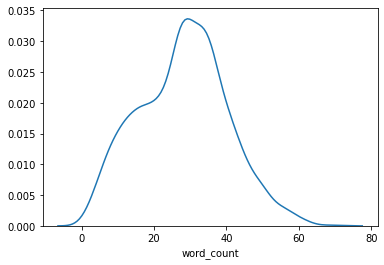

In [ ]:
# distribuição da quantidade de palavras nos tweets
import seaborn as sns
sns.distplot(tweets.word_count, hist=False);

In [ ]:
tweets = tweets[tweets.word_count > 10]
tweets.shape

(3346, 10)

In [ ]:
tweets.near.value_counts()

Brazil    3346
Name: near, dtype: int64

###Base carregada e ajustada. Agora podemos seguir para o pré processamento!

#Pré-processamento do texto


In [ ]:
import nltk
import spacy
!python -m spacy download en_core_web_md
!python -m spacy link en_core_web_md en --force
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
!pip install contractions
from contractions import contractions_dict
import unicodedata

     |████████████████████████████████| 96.4MB 1.3MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=988a22192772dd4e38ed6601915abad510719486448378cc57bfab68139eb003
  Stored in directory: /tmp/pip-ephem-wheel-cache-ypq35clk/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_md -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 245kB 4.6MB/s 
     |████████████████████████████████| 317kB 6.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81710 sha256=f0aa6580672f18a0bc457c068d52bcc52d21a3f628d987be64078d693f2fedca
  Stored in directory: /root/.cache/pip/wheels/0a/

In [ ]:
# Carrega tokenizador e lista de stopwords
nlp = spacy.load('en')
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
stopword_list.append('plus')
stopword_list.append('size')
stopword_list.append('plussize')
stopword_list.append('plussizefashion')
stopword_list.append('plussizefesta')
stopword_list.append('plus size')
stopword_list.append('modaplus')
stopword_list.append('modacurvy')
stopword_list.append('modag')
stopword_list.append('pic.twitter.com')
stopword_list.append('pic')
stopword_list.append('twitter')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopword_list[0:5] # Ver as 5 primeiras stopwords (serão removidas)

['i', 'me', 'my', 'myself', 'we']

In [ ]:
# Código baseado no disponível em:
# https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/notebooks/Ch07_Analyzing_Movie_Reviews_Sentiment/text_normalizer.py
# Algumas alterações foram feitas

'''Remove stopwords'''
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

'''Lematização
O objetivo da lematização e do stemming (função seguinte) é reduzir (deflexionar) uma palavra a sua base.

A diferença entre os dois é que o stemming corta a palavra tentando acertar a sua base na maioria da vezes,
enquanto a lematização reduz a base utilizando um vocabulário e a análise morfológica das palavras.

Exemplos:
1. A palavra "walk" é a base para "walking", e é corretamente reduzida pelo stemming e pela lematização.
2. A palavra "better" tem "good" como base (ou lema). Esse link é perdido pelo stemming.
3. A palavra "meeting" pode ser reduzido para um substantivo ou um verbo dependendo do contexto. 
   E.g., "in our last meeting" ou "We are meeting again tomorrow". 
   A lematização consegue fazer a redução de forma correta.

Deve-se escolher um ou outro. A desvantagem da lematização é que ela é mais custosa do ponto de vista computacional.
'''
def lemmatize(text):
  text = nlp(text)
  text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
  return text

'''Stemming'''
def stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

'''Remove caracteres especiais'''
def remove_special_characters(text, remove_digits=False):
  special_char_pattern = re.compile(r'([{.(-)!}])')
  text = special_char_pattern.sub(" \\1 ", text)

  pattern = r'[^a-zA-z0-9\s]'
  text = re.sub(pattern, '', text)
  return text

'''
Expandir contrações (muito presente na língua inglesa)
you've -> you have
he's -> he is
'''
def expand_contractions(text, contraction_mapping=contractions_dict):
  contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

  def expand_match(contraction):
      match = contraction.group(0)
      first_char = match[0]
      expanded_contraction = contraction_mapping.get(match) \
          if contraction_mapping.get(match) \
          else contraction_mapping.get(match.lower())
      expanded_contraction = first_char + expanded_contraction[1:]
      return expanded_contraction
  
  #pequena mudança aqui
  try:
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
  except:
    return text
  return expanded_text

'''Remove acentos'''
def remove_accent(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

'''Remove links'''
def strip_html_tags(text):
  text = re.sub(r"http[s]?://\S+", "", text)
  text = re.sub(r"\s+", " ", text)
  soup = BeautifulSoup(text, "html.parser")
  stripped_text = soup.get_text()
  return stripped_text

In [ ]:
#Funções para limpar texto: chama todas as funções declaradas acima e faz mais alguns pré processamentos
def clean(corpus):

  normalized_corpus = []
  for doc in corpus:
    # remove links
    doc = strip_html_tags(doc)

    # remove acentuação
    doc = remove_accent(doc)

    # expandir contrações
    doc = expand_contractions(doc)
    # doc = list(cont.expand_texts(doc, precise=True))

    # coloca tudo em caixa baixa
    doc = doc.lower()

    # remove linhas em branco
    doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)

    # lemmatização
    doc = lemmatize(doc)

    # remove caracteres especiais 
    doc = remove_special_characters(doc)

    # remove linhas em branco
    doc = re.sub(' +', ' ', doc)

    # remove stopwords
    doc = remove_stopwords(doc)

    # insere na lista o texto após limpeza
    normalized_corpus.append(doc)

  return normalized_corpus # retorna corpus pré processado

In [ ]:
# Vamos testar a limpeza de dados
c = ["Tim's walking along with his brother \n empty line",
     "UPPER CASE",
     "doctors and nurses #corona",
     "in our last meeting", 
     "We are meeting again tomorrow" , 
     "It's better to talk straight",
     "Renée Zellweger @renee",
     "I'd like to try"]
clean(c)

['tims walk along brother empty line',
 'upper case',
 'doctor nurses corona',
 'last meeting',
 'meet tomorrow',
 'well talk straight',
 'renee zellweger renee',
 'would like try']

In [ ]:
# Agora vamos aplicar a limpeza a nossa base de dados!
import time

start = time.time()
normalized_corpus = clean(tweets.tweet.to_list())
normalized_corpus[0:5]

end = time.time()

In [ ]:
total_time = (end - start)/60 # em minutos
print("Tempo de limpeza dos dados")
print(str(total_time) + " minutos")

Tempo de limpeza dos dados
0.8371137658754985 minutos


In [ ]:
# E substituir na base de dados de tweets
tweets.tweet = normalized_corpus
tweets.tail()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens,word_count
3674,2020-07-29 00:23:45,tulle lace corset https www instagram com p ig...,Sweetie_sexshop,False,1,0,0,Brazil,"[👙, plus, size, tulle, and, lace, corset, 👙, h...",19
3676,2020-07-29 00:21:10,promotion office basic woman blouse sleeveless...,PromobitOficial,False,1,0,0,Brazil,"[promotion, office, basic, women, s, blouse, p...",33
3677,2020-07-29 00:19:47,today poetic license eat huge parish ask juaan...,exu006,False,2,1,0,Brazil,"[today, i, have, a, poetic, license, to, eat, ...",29
3678,2020-07-29 00:15:32,see queen damned love pqp movie com,exu006,False,0,0,1,Brazil,"[have, you, seen, queen, of, the, damned, i, l...",16
3679,2020-07-29 00:09:11,die buy shein sector wonderful,ignez_maira,False,0,0,0,Brazil,"[i, am, dying, to, buy, at, shein, their, plus...",13


Agora já temos nossa base limpa e podemos seguir para análise de sentimentos!

#Análise de Sentimentos


## Vamos primeiro gerar uma wordcloud!

In [ ]:
# https://amueller.github.io/word_cloud/auto_examples/masked.html#sphx-glr-download-auto-examples-masked-py
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

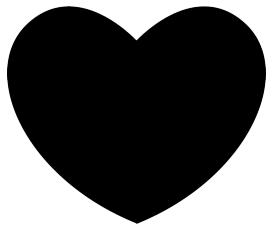

In [ ]:
# Shape tirado do site FlatIcon (https://www.flaticon.com/free-icon/coronavirus_2869116)
plus_mask = np.array(Image.open("heart.png"))

img=mpimg.imread('heart.png')
imgplot = plt.imshow(img)
plt.axis("off");

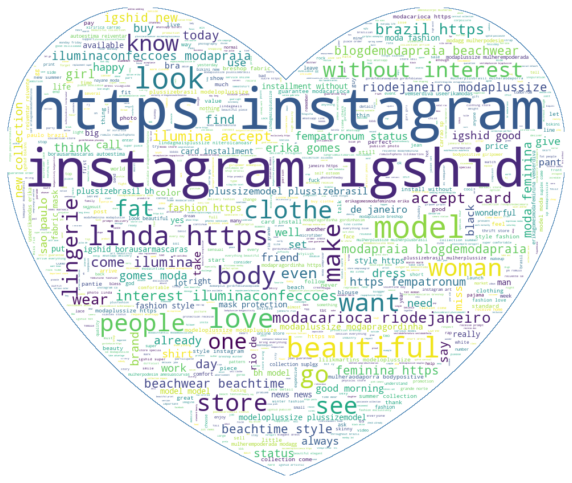

In [ ]:
# define o shape e as características da nuvem de palavras
wc = WordCloud(background_color="white", max_words=2000, mask=plus_mask,
               contour_width=1, contour_color='steelblue')

# inclui as palavras na nuvem
tweets_texts = ' '.join(tweets.tweet) # converte lista de textos em um único texto
wc.generate(tweets_texts)

# mostra a nuvem de palavras
plt.figure(figsize = (10,10))
plt.imshow(wc, interpolation='bilinear'); 
plt.axis("off");

##Agora vamos testar as bibliotecas para análises de sentimentos!


In [ ]:
# Bibliotecas para análise de sentimentos

# https://pypi.org/project/afinn/
!pip install Afinn
from afinn import Afinn

# https://www.nltk.org/
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for Afinn: filename=afinn-0.1-cp36-none-any.whl size=53452 sha256=fb1ee2fecad95bb81411f4d7847a4ccbd82bc86a652304427fa9d622132df62a
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built Afinn
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Pegamos uma frase qualquer
cleaned_text = clean(["I really hate that guy. He's a horrible person!"])
print(cleaned_text)

# E vamos testar a análise usando a biblioteca AFINN
afinn = Afinn()
sentiment_score = afinn.score(cleaned_text[0]) 
print(sentiment_score)

['really hate guy horrible person']
-6.0


In [ ]:
# Vamos testar a biblioteca NLTK
sid = SentimentIntensityAnalyzer()
analysis_score = sid.polarity_scores(cleaned_text[0])
analysis_score

{'compound': -0.8297, 'neg': 0.721, 'neu': 0.279, 'pos': 0.0}

In [ ]:
analysis_score.get('compound') # resultado composto de quão negativa, quão neutra e quão positiva é a frase

-0.8297

In [ ]:
# Vamos agora aplicar a nossa base de dados!

#percorro todos os tweets avaliando o sentimento
sentiment_afinn = []
sentiment_afinn_class = []
sentiment_nltk = []
sentiment_nltk_class = []

for tweet in tweets.tweet:
  afinn_score = afinn.score(tweet)
  sentiment_afinn.append(afinn_score)
  sentiment_afinn_class.append('positive' if afinn_score>0 else 'neutral' if afinn_score == 0 else 'negative')

  nltk_score = sid.polarity_scores(tweet).get('compound')
  sentiment_nltk.append(nltk_score)
  sentiment_nltk_class.append('positive' if nltk_score>0 else 'neutral' if nltk_score == 0 else 'negative')

# Salvo no dataframe
tweets['SentimentAFINN'] = sentiment_afinn 
tweets['SentimentAFINN_class'] = sentiment_afinn_class 
tweets['SentimentNLTK'] = sentiment_nltk 
tweets['SentimentNLTK_class'] = sentiment_nltk_class 

In [ ]:
tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens,word_count,SentimentAFINN,SentimentAFINN_class,SentimentNLTK,SentimentNLTK_class
0,2019-07-29 19:30:00,first photo new car plussizebrasil mulherpluss...,lillooficial_,False,0,0,0,Brazil,"[first, photo, in, the, new, car, plussize, pl...",25,0.0,neutral,0.0000,neutral
1,2019-07-29 16:15:58,vempraseducao aki pantie r store calcadao jose...,seducaosexy,False,0,0,0,Brazil,"[vempraseducao, that, aki, has, plus, size, pa...",33,-1.0,negative,-0.2960,negative
2,2019-07-29 11:58:55,another second phenomenal work work plussizemo...,Lancellot85,False,0,0,0,Brazil,"[another, second, of, phenomenal, work, work, ...",25,0.0,neutral,0.0000,neutral
3,2019-07-29 11:04:22,lingerie white bra cup half cup lace extend st...,Joselaide,False,0,0,0,Brazil,"[♡♡♡♡, lingerie, plus, size, white, ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀...",43,3.0,positive,0.5574,positive
4,2019-07-29 01:07:41,welcome new week lot news cool content ccb mod...,rebotazzoli,False,0,0,0,Brazil,"[welcome, a, new, week, with, lots, of, news, ...",29,3.0,positive,0.6486,positive


In [ ]:
# Tirar hora da data para conseguir agrupar os dados
import re
pattern = '[0-2][0-9]:[0-5][0-9]:[0-5][0-9]'  #==> incluir mais essa parte se a hora estiver no formato hh:mm:ss
timestamps = []
for timestamp in tweets.date:
  timestamps.append(re.sub(pattern, '', timestamp))

tweets.date = timestamps
tweets.head()

,date,tweet,username,retweet,nlikes,nreplies,nretweets,near,tokens,word_count,SentimentAFINN,SentimentAFINN_class,SentimentNLTK,SentimentNLTK_class
0,2019-07-29,first photo new car plussizebrasil mulherpluss...,lillooficial_,False,0,0,0,Brazil,"[first, photo, in, the, new, car, plussize, pl...",25,0.0,neutral,0.0000,neutral
1,2019-07-29,vempraseducao aki pantie r store calcadao jose...,seducaosexy,False,0,0,0,Brazil,"[vempraseducao, that, aki, has, plus, size, pa...",33,-1.0,negative,-0.2960,negative
2,2019-07-29,another second phenomenal work work plussizemo...,Lancellot85,False,0,0,0,Brazil,"[another, second, of, phenomenal, work, work, ...",25,0.0,neutral,0.0000,neutral
3,2019-07-29,lingerie white bra cup half cup lace extend st...,Joselaide,False,0,0,0,Brazil,"[♡♡♡♡, lingerie, plus, size, white, ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀...",43,3.0,positive,0.5574,positive
4,2019-07-29,welcome new week lot news cool content ccb mod...,rebotazzoli,False,0,0,0,Brazil,"[welcome, a, new, week, with, lots, of, news, ...",29,3.0,positive,0.6486,positive


In [ ]:
# calcular a média dos sentimetos para toda a base
mean_sentiments = tweets.groupby('date').mean()
mean_sentiments.head()

,retweet,nlikes,nreplies,nretweets,word_count,SentimentAFINN,SentimentNLTK
date,,,,,,,
2019-07-29,False,0.000000,0.0,0.00,30.666667,1.333333,0.259767
2019-07-31,False,1.333333,0.0,0.00,43.833333,2.166667,0.214567
2019-08-01,False,1.250000,0.0,0.25,33.000000,7.000000,0.689850
2019-08-02,False,0.000000,0.0,0.00,31.166667,1.833333,0.289967
2019-08-03,False,0.500000,0.0,0.00,27.500000,3.250000,0.463425


###AFINN

Finn Årup Nielsen, "A new ANEW: evaluation of a word list for sentiment analysis in microblogs", Proceedings of the ESWC2011 Workshop on 'Making Sense of Microposts': Big things come in small packages. Volume 718 in CEUR Workshop Proceedings: 93-98. 2011 May. Matthew Rowe, Milan Stankovic, Aba-Sah Dadzie, Mariann Hardey (editors)
Paper with supplement: http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6006/pdf/imm6006.pdf

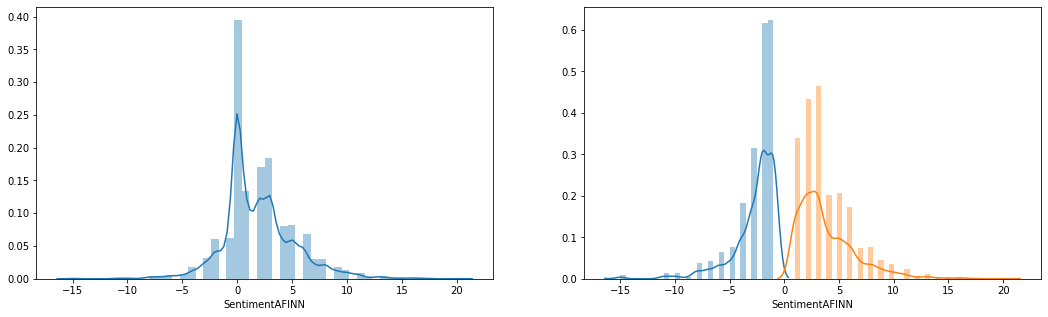

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(18,5))
sns.distplot(tweets.SentimentAFINN, label = 'polarity', ax=axs[0]);

negative_tweets = tweets[tweets.SentimentAFINN_class == 'negative']
positive_tweets = tweets[tweets.SentimentAFINN_class == 'positive']
neutral_tweets = tweets[tweets.SentimentAFINN_class == 'neutral']
sns.distplot(negative_tweets.SentimentAFINN, label = 'negative');
sns.distplot(positive_tweets.SentimentAFINN, label = 'positive');

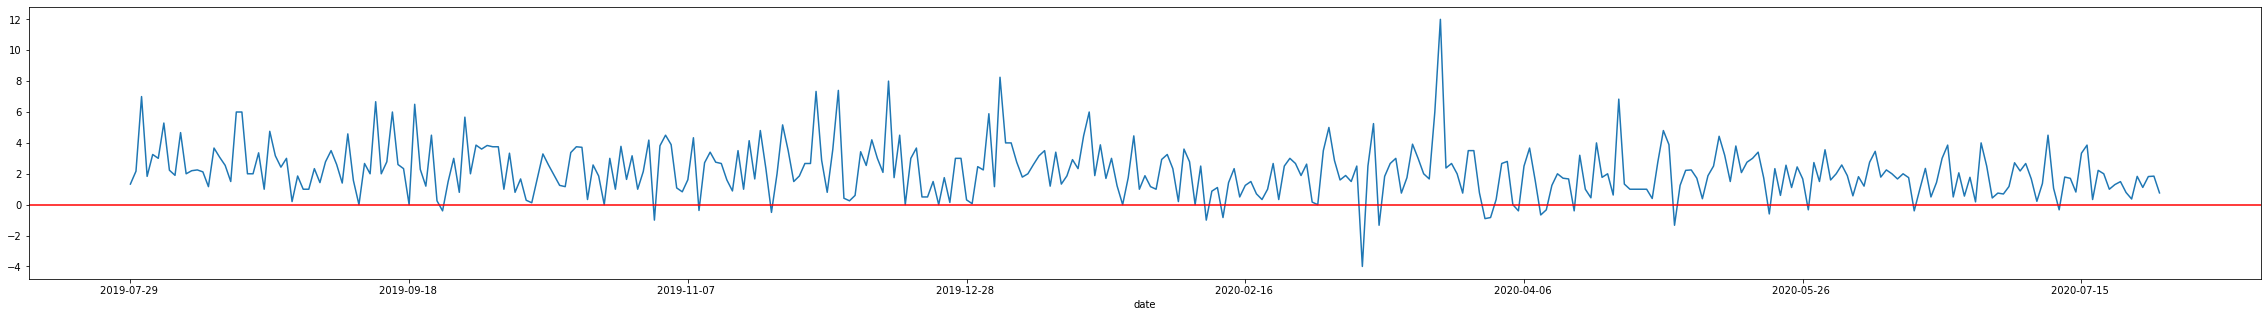

In [ ]:
chart = mean_sentiments.SentimentAFINN.plot(figsize=(40,5)); # se quiser aumentar o tamanho do gráfico, passar como parâmetro: figsize=(10,5)
plt.axhline(y=0, color='r', linestyle='-');
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

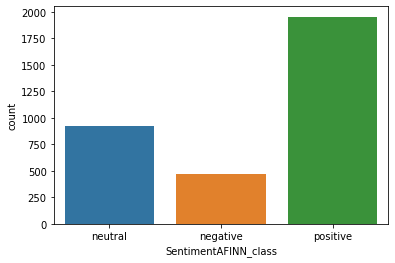

In [ ]:
sns.countplot(x='SentimentAFINN_class', data=tweets);

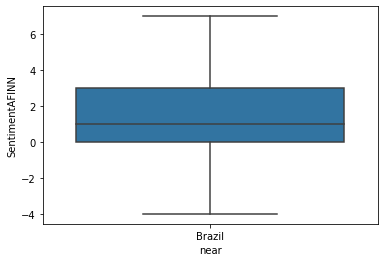

In [ ]:
# boxplot da polaridade por cidade
sns.boxplot(x='near', y='SentimentAFINN', data=tweets, showfliers = False);
# sns.swarmplot(x='near', y='SentimentAFINN', data=tweets, color="gray", size=3);

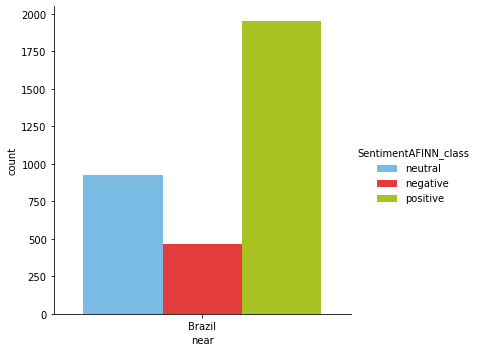

In [ ]:
sns.catplot(x="near", hue="SentimentAFINN_class", data=tweets, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"});

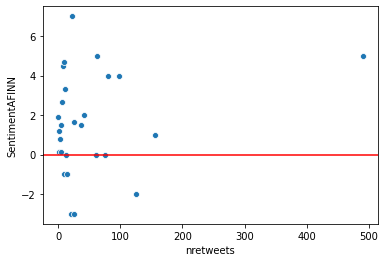

In [ ]:
mean_by_nretweets = tweets.groupby('nretweets').mean()
mean_by_nretweets=mean_by_nretweets[0:234] # retirar os últimos 3 que são muito extremos

# fig, axs = plt.subplots())
sns.scatterplot(x=mean_by_nretweets.index, y="SentimentAFINN", data=mean_by_nretweets)
plt.axhline(y=0, color='r', linestyle='-');

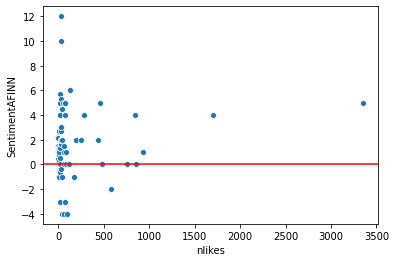

In [ ]:
mean_by_nlikes = tweets.groupby('nlikes').mean()
mean_by_nlikes=mean_by_nlikes[0:234] # retirar os últimos 3 que são muito extremos
sns.scatterplot(x=mean_by_nlikes.index, y="SentimentAFINN", data=mean_by_nlikes)
plt.axhline(y=0, color='r', linestyle='-');

###NLTK

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

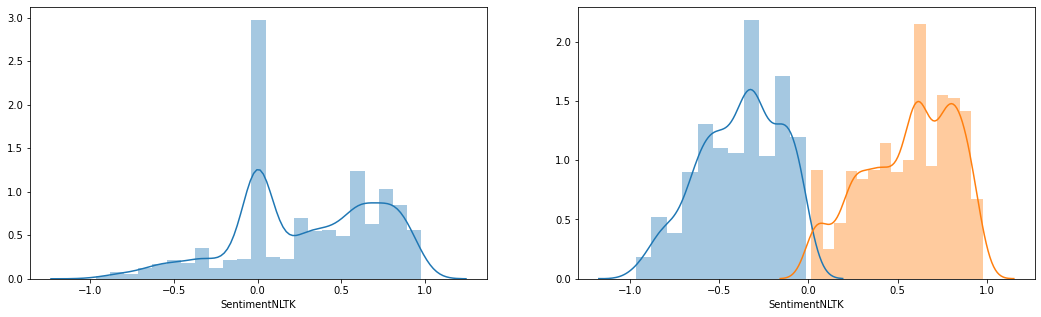

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(18,5))
sns.distplot(tweets.SentimentNLTK, label = 'polarity', ax=axs[0]);

negative_tweets = tweets[tweets.SentimentNLTK_class == 'negative']
positive_tweets = tweets[tweets.SentimentNLTK_class == 'positive']
sns.distplot(negative_tweets.SentimentNLTK, label = 'negative');
sns.distplot(positive_tweets.SentimentNLTK, label = 'positive');

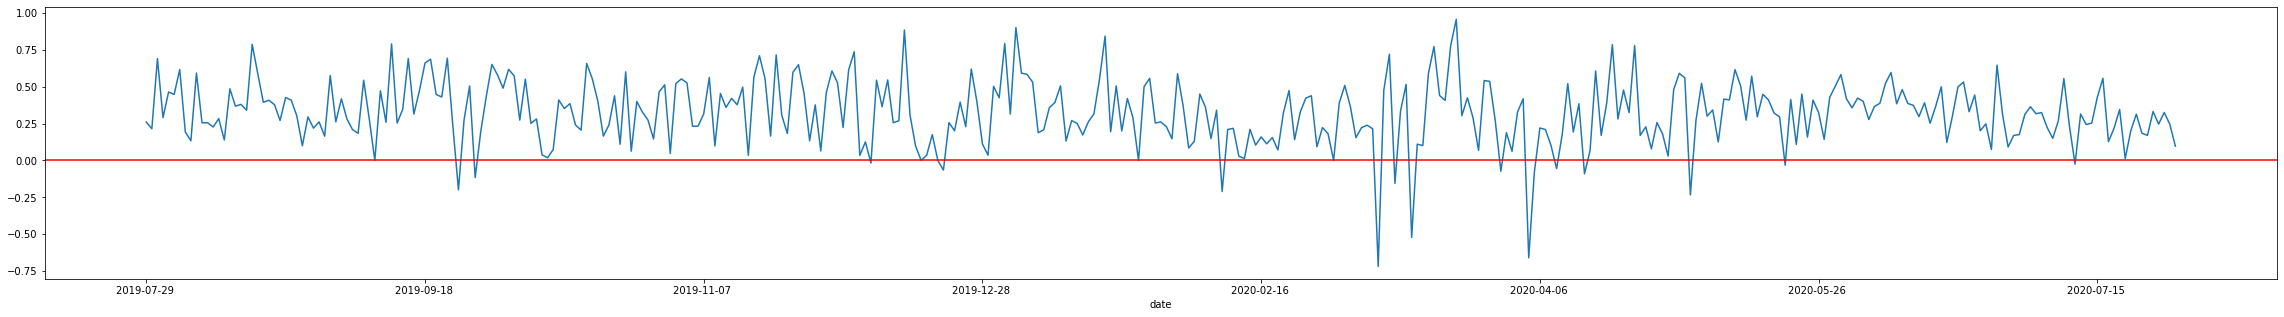

In [ ]:
mean_sentiments.SentimentNLTK.plot(figsize=(40,5));
plt.axhline(y=0, color='r', linestyle='-');

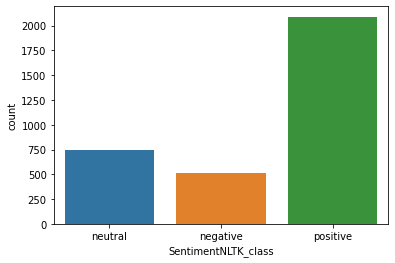

In [ ]:
sns.countplot(x='SentimentNLTK_class', data=tweets);

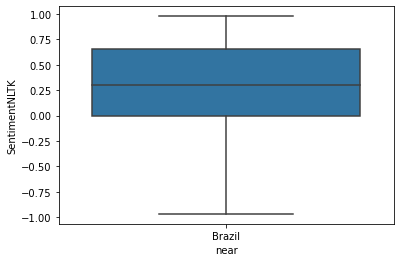

In [ ]:
# boxplot da polaridade por cidade
sns.boxplot(x='near', y='SentimentNLTK', data=tweets, showfliers = False);

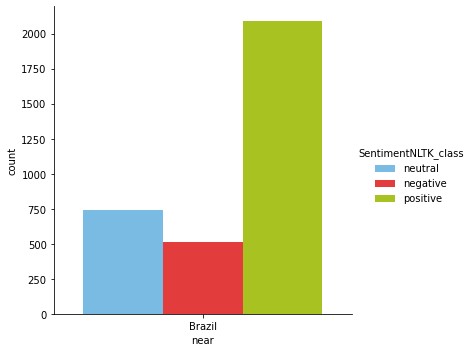

In [ ]:
sns.catplot(x="near", hue="SentimentNLTK_class", data=tweets, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"});

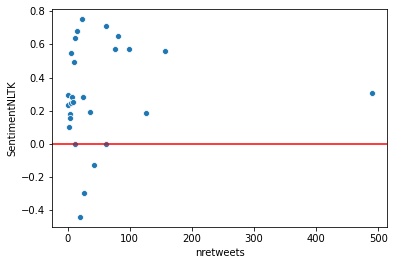

In [ ]:
mean_by_nretweets = tweets.groupby('nretweets').mean()
mean_by_nretweets=mean_by_nretweets[0:234] # retirar os últimos 3 que são muito extremos

# fig, axs = plt.subplots())
sns.scatterplot(x=mean_by_nretweets.index, y="SentimentNLTK", data=mean_by_nretweets)
plt.axhline(y=0, color='r', linestyle='-');

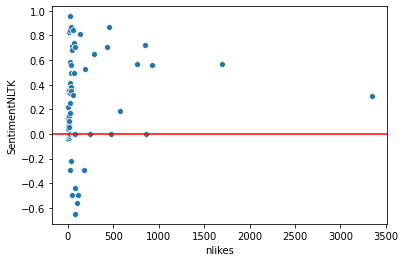

In [ ]:
mean_by_nlikes = tweets.groupby('nlikes').mean()
mean_by_nlikes=mean_by_nlikes[0:234] # retirar os últimos 3 que são muito extremos
sns.scatterplot(x=mean_by_nlikes.index, y="SentimentNLTK", data=mean_by_nlikes)
plt.axhline(y=0, color='r', linestyle='-');

# Melhorias que poderiam ser feitas



1.   Limpar tweets que contenham poucas palavras;
2.   Buscar tweets no mundo inteiro;
3.   Avaliar emoções de raiva, de tristeza, felicidade, etc, além das categorias 'positivo', 'neutro' e 'negativo' explorados neste trabalho;
4.   Criar wordcloud por país, por classificação de sentimento e por país E classificação de sentimento.
5.   Utilizar modelos de machine learning para análise de sentimentos.
6.   Analisar a filtragem de retweets.
7.   Filtrar teets de bots (machine learning).
8. Analisar palavras repetidas na wordcloud.


